In [6]:
%load_ext autoreload  
# Load the autoreload extension to automatically reload modules before executing user code.

%autoreload 2  
# Set autoreload to mode 2, which reloads all imported modules before executing a new code block.

import sys  
sys.path.append('../')  
# Add the parent directory to the system path to allow importing 'class_func.py' from the upper directory.

import OCPY as op  
# Import the 'class_func.py' module and alias it as 'op' for easier reference.

import numpy as np  
# Import NumPy for numerical operations.

from matplotlib import pyplot as plt  
# Import the plotting module from Matplotlib for visualizing data.

import pandas as pd  
# Import Pandas for handling and analyzing tabular data.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
data = op.OC_data(data_file="999_xy_boo.xlsx")  
# The OC_data object can also be loaded directly from a data file (can be excel or csv).
# If you want to create your own data file check the example file '999_xy_boo.xlsx'
# It directly calculates Ecorr and OC values when mintimes and mintypes are given.


# IMPORTANT NOTE THIS OBJECT is slightly edited so it can have false data.

In [8]:
data.df
# Also when data object is created it aoutamatically creates a pandas dataframe.

,Mintimes,Mintypes,Errors,Units,Data_group,Ecorr,OC,Weights
0,31215.3860,0,0.01,HJD,vis,-23582.0,0.001248,10000.0
1,31216.3400,1,0.01,BJD,vis,-23579.5,0.028838,10000.0
2,31219.2600,1,0.01,BJD,vis,-23571.5,-0.015674,10000.0
3,31221.3300,0,0.01,BJD,vis,-23566.0,0.016224,10000.0
4,31225.4000,0,0.01,BJD,vis,-23555.0,0.010020,10000.0
...,...,...,...,...,...,...,...,...
192,57876.7248,0,0.01,BJD,CCD,48366.0,0.001376,10000.0
193,58244.6952,0,0.01,BJD,CCD,49359.0,0.001724,10000.0
194,58599.7012,0,0.01,BJD,CCD,50317.0,0.007412,10000.0
195,58618.4270,1,0.01,BJD,CCD,50367.5,0.019730,10000.0


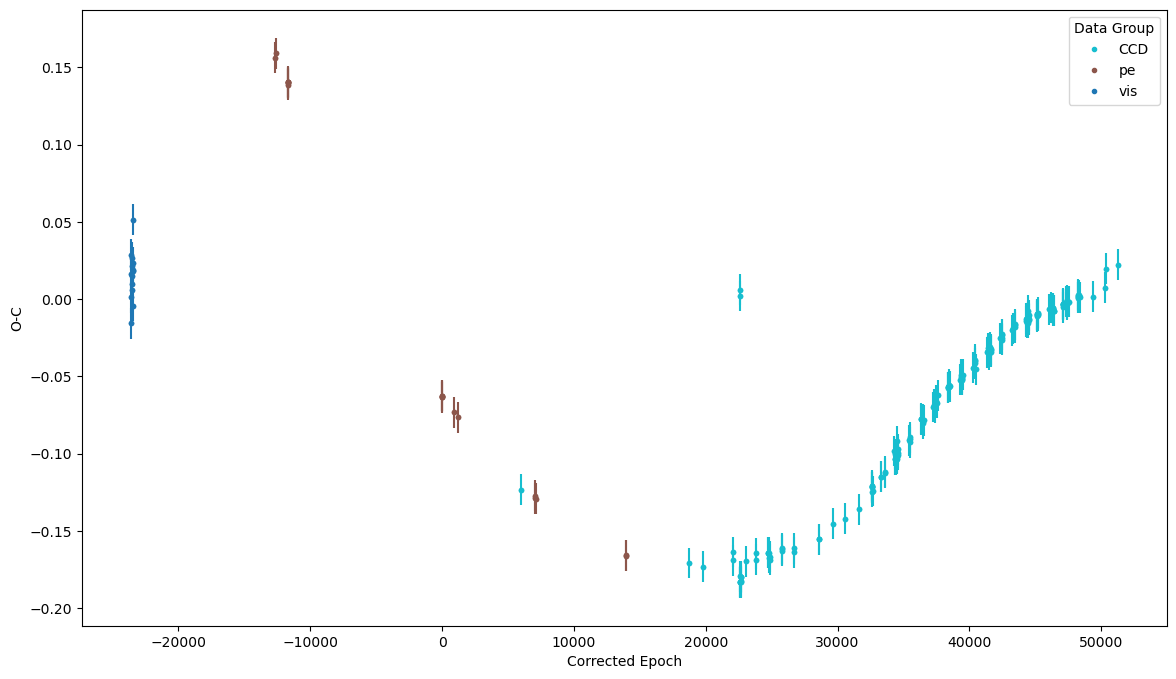

In [9]:
data.plot_OC()  
# Plot the O-C (Observed minus Calculated) diagram using the loaded data.
# This visualizes timing variations of the eclipsing binary star XY Boo over time.

In [10]:
data = data.filter_data_range(dtype="Data_group", noteq="vis")  
# You can filter data object by equality, min, max values
# For this example the OC data is filtered by excluding entries where the "Data_group" column is equal to "vis".

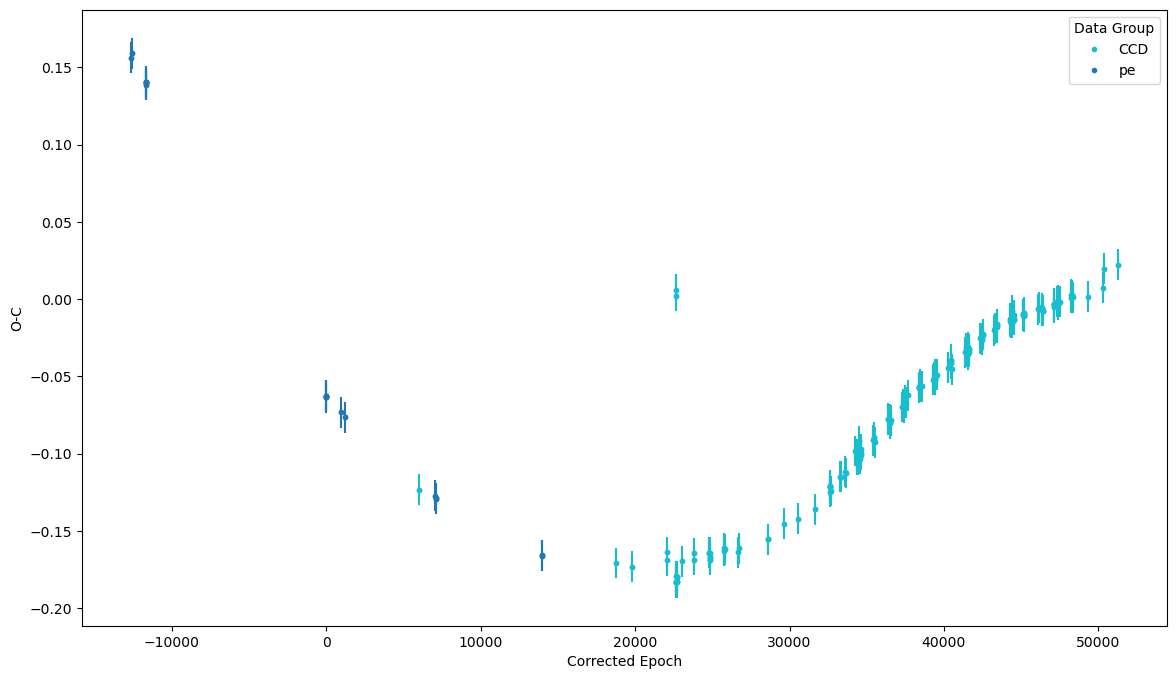

In [11]:
data.plot_OC()

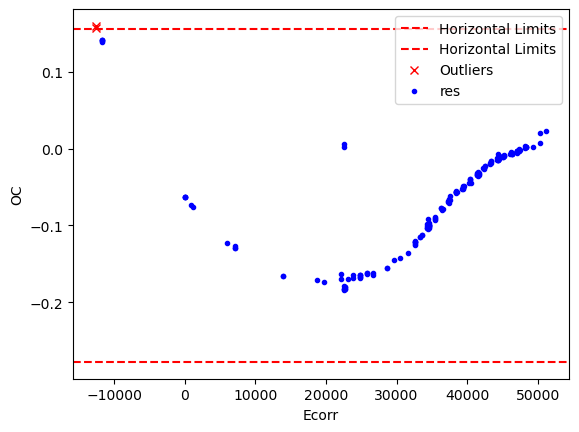

In [12]:
outliers = data.sigma_outliers(treshold=3, plot=True)  
# Identify outliers using a threshold of ±3 * sigma from the mean.
# 'treshold' (k) defines how many standard deviations away a point must be to be considered an outlier.
# 'plot=True' generates a plot showing both retained and removed data points.

data2 = data.remove_outliers(outliers=outliers)  
# Remove the identified outlier points from the dataset.
# This results in a cleaned dataset that excludes extreme deviations.

# NOTE There are plenty more outlier finding method that can be found in the code. TODO will documented later.

# For now this is the list:

# sigma_outliers: Detects outliers using sigma-clipping method.
# zscore_outliers: Detects outliers using z-score method.
# box_outliers: Detects outliers using boxplot method.
# chauvenet_outliers: Detects outliers using Chauvenet's criterion method.

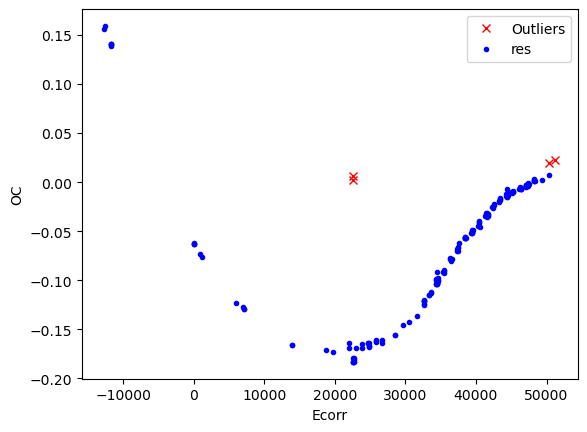

In [13]:
outliers = data.sigma_outliers(
    treshold=3, 
    plot=True, 
    additional_method="moving_window", 
    additional_params={"window_rate": 0.1, "window_step_rate": 0.03}
)  
# Identify outliers using both the standard sigma method (±3 * sigma) and a moving window approach.
# 'additional_method="moving_window"' enables outlier detection within a sliding window across the dataset.
# Additional parameters:
# - 'window_rate': Defines the size of the moving window as a fraction of the dataset length (0.1 = 10%).
# - 'window_step_rate': Defines how much the window moves forward in each step as a fraction of the dataset (0.03 = 3%).

# NOTE values that eliminated in the middle of the plot are not present in real data. They are created for this code

data2 = data.remove_outliers(outliers=outliers)  
# Remove the identified outliers, keeping only the filtered dataset.

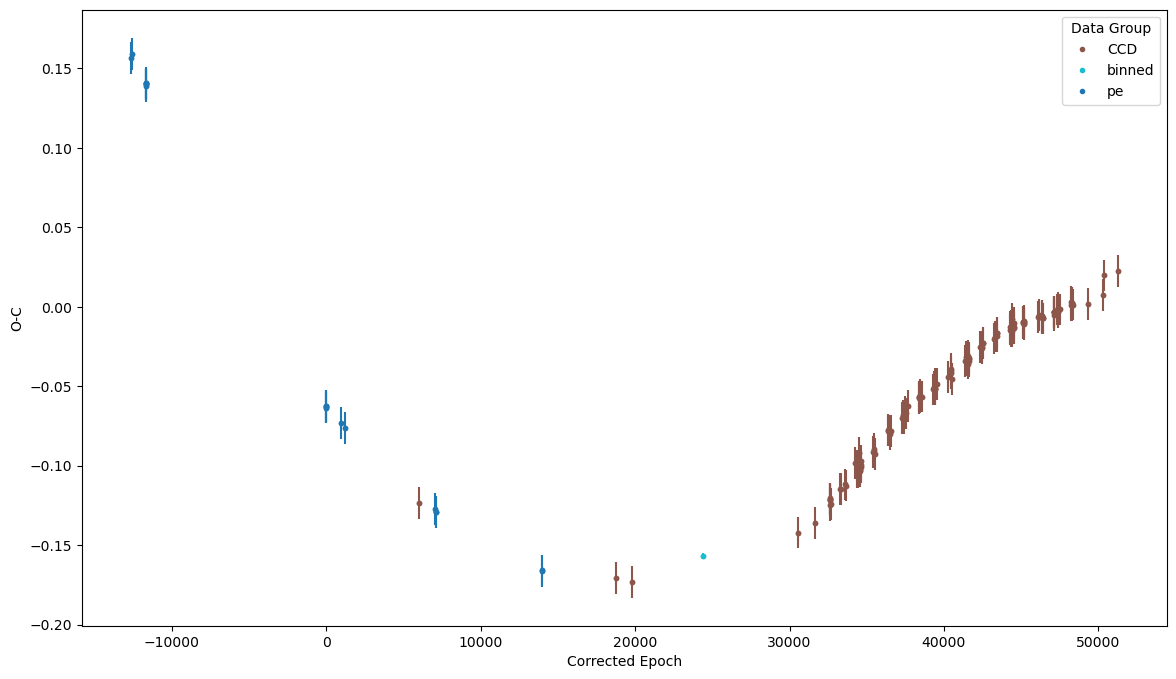

In [14]:
binned_data = data.binning(20000, 30000)  
# Perform binning on the data to reduce noise and group observations within a specified range.
# The first argument (20000) represents the bin size or start range.
# The second argument (30000) represents the end range or binning step, depending on implementation.
# Binned data's error recalculated.

binned_data.plot_OC()  
# Plot the O-C diagram of the binned data.
# This visualizes the trend more clearly by averaging data points within each bin.